### Import libraries

In [ ]:
import rasterio
from rasterio.mask import mask
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

### Read in Employment and Grocery Merged Dataset

In [ ]:
mpls_emp_df = pd.read_csv('employment_and_grocery_merged_updated.csv')

### Read in Geospatial Dataset

In [ ]:
# read in dataset
mpls_nlcd = rasterio.open('mpls_nlcd.tif')

# read in Minneapolis neighborhoods data
mpls_neighborhoods_df = gpd.read_file('Minneapolis_Neighborhoods.geojson')

# reproject the vector data to be the same as the raster
mpls_neighborhoods_df = mpls_neighborhoods_df.to_crs(crs=mpls_nlcd.crs)

<Axes: >

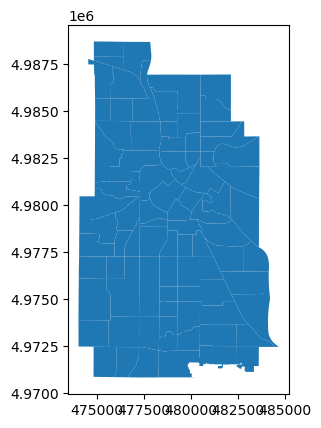

In [ ]:
mpls_neighborhoods_df.plot()

### Filter Employment Data to 10 Year Increments

In [ ]:
mpls_emp_df_2002 = mpls_emp_df.loc[(mpls_emp_df['Year'] == 2002)]
mpls_emp_df_2012 = mpls_emp_df.loc[(mpls_emp_df['Year'] == 2012)]
mpls_emp_df_2022 = mpls_emp_df.loc[(mpls_emp_df['Year'] == 2022)]

In [ ]:
mpls_emp_df_2002

,Zipcode,Year,Total Employment in Zipcode,Total Establishments in Zipcode,Total Payroll in Zipcode,Employment for NAICS 722,Establishments for NAICS 722,Avg. Annual Wage for NAICS 722,Total Payroll for NAICS 722,Flour Avg Price per lb,...,Total Payroll for NAICS 722 Yearly % Change,Neighborhood,Adjusted Avg. Annual Wage for NAICS 722,Adjusted Flour Avg Price per lb,Adjusted Rice Avg Price per lb,Adjusted Avg. Annual Wage for NAICS 722 Yearly % Change,Adjusted Avg. Flour Avg Price per lb Yearly % Change,Adjusted Avg. Rice Avg Price per lb Yearly % Change,% Difference Avg. Wage NAICS 722 - Flour,% Difference Avg. Wage NAICS 722 - Rice
2,"55401-04;15,54,87,88",2002,142347,4462,8.143669e+09,8185,369,15340.0,125700410.0,0.3115,...,0.021146,North Loop,24954.573096,0.506737,0.763563,-0.018890,0.014284,-0.029266,-0.033174,0.010376
25,"55405,08,16",2002,13922,1465,5.000406e+08,0,0,0.0,0.0,0.3115,...,0.000000,Lowry Hill,0.000000,0.506737,0.763563,NaN,0.014284,-0.029266,NaN,NaN
48,55406,2002,6155,419,2.153939e+08,0,0,0.0,0.0,0.3115,...,0.000000,Howe,0.000000,0.506737,0.763563,NaN,0.014284,-0.029266,NaN,NaN
71,55407,2002,4010,324,1.627424e+08,466,42,12792.0,5956071.0,0.3115,...,0.071916,Powderhorn Park,20809.576209,0.506737,0.763563,0.052918,0.014284,-0.029266,0.038635,0.082184
94,"55409,10,19",2002,9343,1176,2.668528e+08,883,66,12272.0,10842984.0,0.3115,...,0.135865,King Field,19963.658477,0.506737,0.763563,0.023466,0.014284,-0.029266,0.009183,0.052732
117,55411,2002,6447,277,2.455061e+08,0,0,0.0,0.0,0.3115,...,-1.000000,Near - North,0.000000,0.506737,0.763563,-1.000000,0.014284,-0.029266,-1.014284,-0.970734
140,"55412,30",2002,1857,121,6.744860e+07,0,0,0.0,0.0,0.3115,...,0.000000,Webber - Camden,0.000000,0.506737,0.763563,NaN,0.014284,-0.029266,NaN,NaN
163,"55413,18,21",2002,22400,1117,1.031305e+09,0,0,0.0,0.0,0.3115,...,0.000000,Beltrami,0.000000,0.506737,0.763563,NaN,0.014284,-0.029266,NaN,NaN
186,"55414,55",2002,26274,809,1.190152e+09,1740,96,13468.0,23512329.0,0.3115,...,0.111279,University of Minnesota,21909.269261,0.506737,0.763563,0.049255,0.014284,-0.029266,0.034971,0.078520
209,55417,2002,1761,232,5.313767e+07,0,0,0.0,0.0,0.3115,...,0.000000,Wenonah,0.000000,0.506737,0.763563,NaN,0.014284,-0.029266,NaN,NaN


### Merge Datasets

In [ ]:
geo_merge_df_2002 = pd.merge(mpls_emp_df_2002, mpls_neighborhoods_df, how='outer', left_on='Neighborhood', right_on='BDNAME')
# set the active geometry
geo_merge_df_2002 = geo_merge_df_2002.set_geometry("geometry")
#view the head
geo_merge_df_2002.head()

,Zipcode,Year,Total Employment in Zipcode,Total Establishments in Zipcode,Total Payroll in Zipcode,Employment for NAICS 722,Establishments for NAICS 722,Avg. Annual Wage for NAICS 722,Total Payroll for NAICS 722,Flour Avg Price per lb,...,INT_REFNO,PREFIX,UDI,SYMBOL_NAM,BDNAME,BDNUM,TEXT_NBR,SHAPE_Length,SHAPE_Area,geometry
0,"55401-04;15,54,87,88",2002.0,142347.0,4462.0,8.143669e+09,8185.0,369.0,15340.0,125700410.0,0.3115,...,-2.144131e+09,REFNO,23186.00,WARDAREA,North Loop,86,86,0.073627,0.000253,"MULTIPOLYGON (((478550.326 4982112.307, 478592..."
1,"55405,08,16",2002.0,13922.0,1465.0,5.000406e+08,0.0,0.0,0.0,0.0,0.3115,...,-2.144136e+09,REFNO,23143.00,WARDAREA,Lowry Hill,43,43,0.057112,0.000179,"MULTIPOLYGON (((477293.021 4980440.894, 477292..."
2,55406,2002.0,6155.0,419.0,2.153939e+08,0.0,0.0,0.0,0.0,0.3115,...,-2.144134e+09,REFNO,23163.00,WARDAREA,Howe,63,63,0.082525,0.000314,"MULTIPOLYGON (((484138.698 4976477.210, 484136..."
3,55407,2002.0,4010.0,324.0,1.627424e+08,466.0,42.0,12792.0,5956071.0,0.3115,...,-2.144134e+09,REFNO,23155.00,WARDAREA,Powderhorn Park,55,55,0.058877,0.000216,"MULTIPOLYGON (((480482.625 4976064.000, 480482..."
4,"55409,10,19",2002.0,9343.0,1176.0,2.668528e+08,883.0,66.0,12272.0,10842984.0,0.3115,...,-2.144133e+09,REFNO,23171.00,WARDAREA,King Field,71,71,0.063381,0.000246,"MULTIPOLYGON (((478327.523 4976072.079, 478327..."


In [ ]:
geo_merge_df_2012 = pd.merge(mpls_emp_df_2012, mpls_neighborhoods_df, how='outer', left_on='Neighborhood', right_on='BDNAME')
# set the active geometry
geo_merge_df_2012 = geo_merge_df_2012.set_geometry("geometry")
#view the head
geo_merge_df_2012.head()

,Zipcode,Year,Total Employment in Zipcode,Total Establishments in Zipcode,Total Payroll in Zipcode,Employment for NAICS 722,Establishments for NAICS 722,Avg. Annual Wage for NAICS 722,Total Payroll for NAICS 722,Flour Avg Price per lb,...,INT_REFNO,PREFIX,UDI,SYMBOL_NAM,BDNAME,BDNUM,TEXT_NBR,SHAPE_Length,SHAPE_Area,geometry
0,"55401-04;15,54,87,88",2012.0,154014.0,4284.0,1.156787e+10,9460.0,416.0,20280.0,192059097.0,0.516917,...,-2.144131e+09,REFNO,23186.00,WARDAREA,North Loop,86,86,0.073627,0.000253,"MULTIPOLYGON (((478550.326 4982112.307, 478592..."
1,"55405,08,16",2012.0,17660.0,1454.0,7.324561e+08,3806.0,164.0,18304.0,69644617.0,0.516917,...,-2.144136e+09,REFNO,23143.00,WARDAREA,Lowry Hill,43,43,0.057112,0.000179,"MULTIPOLYGON (((477293.021 4980440.894, 477292..."
2,55406,2012.0,6773.0,536.0,2.256611e+08,930.0,53.0,15288.0,14275447.0,0.516917,...,-2.144134e+09,REFNO,23163.00,WARDAREA,Howe,63,63,0.082525,0.000314,"MULTIPOLYGON (((484138.698 4976477.210, 484136..."
3,55407,2012.0,4462.0,348.0,2.684821e+08,555.0,55.0,17524.0,9751158.0,0.516917,...,-2.144134e+09,REFNO,23155.00,WARDAREA,Powderhorn Park,55,55,0.058877,0.000216,"MULTIPOLYGON (((480482.625 4976064.000, 480482..."
4,"55409,10,19",2012.0,6993.0,896.0,2.499871e+08,0.0,0.0,0.0,0.0,0.516917,...,-2.144133e+09,REFNO,23171.00,WARDAREA,King Field,71,71,0.063381,0.000246,"MULTIPOLYGON (((478327.523 4976072.079, 478327..."


In [ ]:
geo_merge_df_2022 = pd.merge(mpls_emp_df_2022, mpls_neighborhoods_df, how='outer', left_on='Neighborhood', right_on='BDNAME')
# set the active geometry
geo_merge_df_2022 = geo_merge_df_2022.set_geometry("geometry")
#view the head
geo_merge_df_2022.head()

,Zipcode,Year,Total Employment in Zipcode,Total Establishments in Zipcode,Total Payroll in Zipcode,Employment for NAICS 722,Establishments for NAICS 722,Avg. Annual Wage for NAICS 722,Total Payroll for NAICS 722,Flour Avg Price per lb,...,INT_REFNO,PREFIX,UDI,SYMBOL_NAM,BDNAME,BDNUM,TEXT_NBR,SHAPE_Length,SHAPE_Area,geometry
0,"55401-04;15,54,87,88",2022.0,153292.0,4379.0,1.729138e+10,7993.0,403.0,32708.0,262605818.0,0.493917,...,-2.144131e+09,REFNO,23186.00,WARDAREA,North Loop,86,86,0.073627,0.000253,"MULTIPOLYGON (((478550.326 4982112.307, 478592..."
1,"55405,08,16",2022.0,16045.0,1467.0,1.083206e+09,0.0,0.0,0.0,0.0,0.493917,...,-2.144136e+09,REFNO,23143.00,WARDAREA,Lowry Hill,43,43,0.057112,0.000179,"MULTIPOLYGON (((477293.021 4980440.894, 477292..."
2,55406,2022.0,8333.0,730.0,3.773957e+08,1068.0,72.0,27144.0,29030047.0,0.493917,...,-2.144134e+09,REFNO,23163.00,WARDAREA,Howe,63,63,0.082525,0.000314,"MULTIPOLYGON (((484138.698 4976477.210, 484136..."
3,55407,2022.0,7015.0,635.0,5.120765e+08,691.0,78.0,26520.0,18358914.0,0.493917,...,-2.144134e+09,REFNO,23155.00,WARDAREA,Powderhorn Park,55,55,0.058877,0.000216,"MULTIPOLYGON (((480482.625 4976064.000, 480482..."
4,"55409,10,19",2022.0,7079.0,1219.0,3.760300e+08,0.0,0.0,0.0,0.0,0.493917,...,-2.144133e+09,REFNO,23171.00,WARDAREA,King Field,71,71,0.063381,0.000246,"MULTIPOLYGON (((478327.523 4976072.079, 478327..."


### Plot NAICS 722 Establishment Counts as Centroids

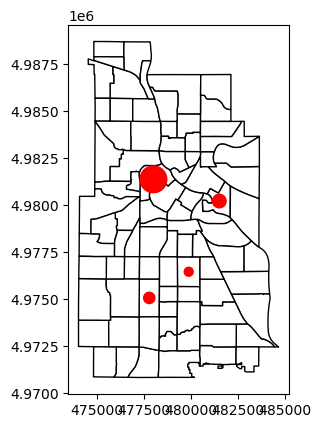

In [ ]:
# add the centroids column
geo_merge_df_2002['neighborhood_centroid'] = geo_merge_df_2002.centroid

# set the base layer for multilayered map plot
base = geo_merge_df_2002.plot(color='white', edgecolor='black')

# plot 2002 NAICS 722 Establishments
geo_merge_df_2002['neighborhood_centroid'].plot(ax=base, marker='o', color='red', markersize=geo_merge_df_2002['Establishments for NAICS 722']);

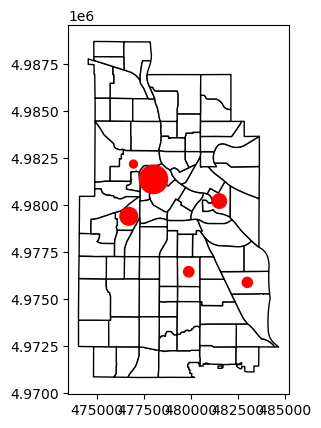

In [ ]:
# add the centroids column
geo_merge_df_2012['neighborhood_centroid'] = geo_merge_df_2012.centroid

# set the base layer for multilayered map plot
base = geo_merge_df_2012.plot(color='white', edgecolor='black')

# plot 2012 NAICS 722 Establishments
geo_merge_df_2012['neighborhood_centroid'].plot(ax=base, marker='o', color='red', markersize=geo_merge_df_2012['Establishments for NAICS 722']);

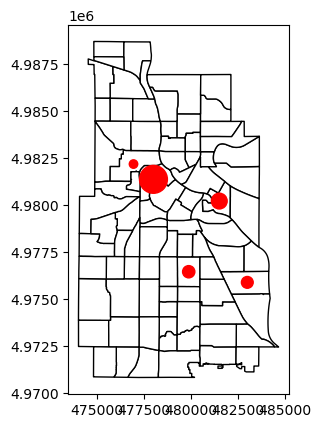

In [ ]:
# add the centroids column
geo_merge_df_2022['neighborhood_centroid'] = geo_merge_df_2022.centroid

# set the base layer for multilayered map plot
base = geo_merge_df_2022.plot(color='white', edgecolor='black')

# plot 2012 NAICS 722 Establishments
geo_merge_df_2022['neighborhood_centroid'].plot(ax=base, marker='o', color='red', markersize=geo_merge_df_2022['Establishments for NAICS 722']);

### Plot NAICS 722 Establishment Avg Annual Wage as Centroids

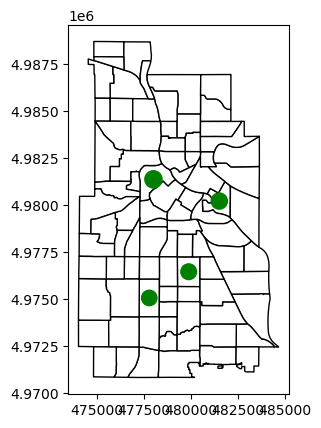

In [ ]:
# add the centroids column
geo_merge_df_2002['neighborhood_centroid'] = geo_merge_df_2002.centroid

# set the base layer for multilayered map plot
base = geo_merge_df_2002.plot(color='white', edgecolor='black')

# plot 2002 NAICS 722 Avg Annual Wage
geo_merge_df_2002['neighborhood_centroid'].plot(ax=base, marker='o', color='green', markersize=geo_merge_df_2002['Avg. Annual Wage for NAICS 722']/100);

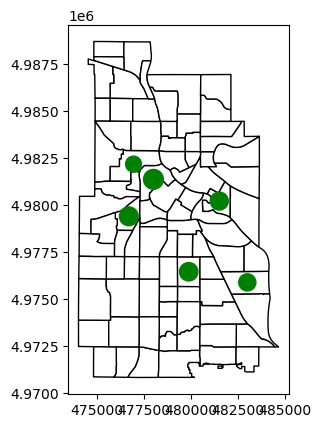

In [ ]:
# add the centroids column
geo_merge_df_2012['neighborhood_centroid'] = geo_merge_df_2012.centroid

# set the base layer for multilayered map plot
base = geo_merge_df_2012.plot(color='white', edgecolor='black')

# plot 2012 NAICS 722 Avg Annual Wage
geo_merge_df_2012['neighborhood_centroid'].plot(ax=base, marker='o', color='green', markersize=geo_merge_df_2012['Avg. Annual Wage for NAICS 722']/100);

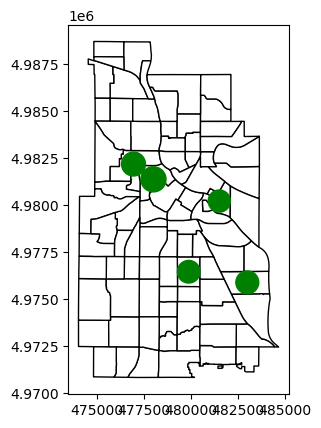

In [ ]:
# add the centroids column
geo_merge_df_2022['neighborhood_centroid'] = geo_merge_df_2022.centroid

# set the base layer for multilayered map plot
base = geo_merge_df_2022.plot(color='white', edgecolor='black')

# plot 2012 NAICS 722 Avg Annual Wage
geo_merge_df_2022['neighborhood_centroid'].plot(ax=base, marker='o', color='green', markersize=geo_merge_df_2022['Avg. Annual Wage for NAICS 722']/100);